In [1]:
import pandas as pd

In [3]:
from scipy.io import arff        # function to read .arff files
import pandas as pd              # pandas already imported, harmless to re-import
fn = "D:\HEgl data\EEG Eye State.arff"       # change this path if your file is elsewhere

# 1) read the ARFF file (returns a numpy record array and metadata)
data, meta = arff.loadarff(fn)

# 2) convert to pandas DataFrame for easy inspection & processing
df = pd.DataFrame(data)

# 3) quick checks: shape and column names
print("Rows, Columns:", df.shape)
print("Columns:", df.columns.tolist())

# 4) peek first 5 rows to confirm data looks correct
df.head()


Rows, Columns: (14980, 15)
Columns: ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'eyeDetection']


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [4]:
# Convert label from byte string (b'0'/b'1') to integer (0/1)
df['label'] = df['eyeDetection'].apply(lambda x: int(x.decode()) if isinstance(x, bytes) else int(x))

# Drop the old byte column
df = df.drop(columns=['eyeDetection'])

# Confirm the new label column looks good
print(df['label'].value_counts())
df.head()


label
0    8257
1    6723
Name: count, dtype: int64


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [5]:
# Save the cleaned DataFrame to CSV
df.to_csv("eeg_eye_state_clean.csv", index=False)

print("Clean dataset saved as: eeg_eye_state_clean.csv")

# Quick check: reload the saved CSV to confirm
df_check = pd.read_csv("eeg_eye_state_clean.csv")
print(df_check.shape)
df_check.head()


Clean dataset saved as: eeg_eye_state_clean.csv
(14980, 15)


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [7]:
#EDA
# Basic statistics of EEG channels
df.describe().T[['mean','std','min','25%','50%','75%','max']]


,mean,std,min,25%,50%,75%,max
AF3,4321.917777,2492.072174,1030.7700,4280.51,4294.36,4311.79,309231.00
F7,4009.767694,45.941672,2830.7700,3990.77,4005.64,4023.08,7804.62
F3,4264.022433,44.428052,1040.0000,4250.26,4262.56,4270.77,6880.51
FC5,4164.946326,5216.404632,2453.3300,4108.21,4120.51,4132.31,642564.00
T7,4341.741075,34.738821,2089.7400,4331.79,4338.97,4347.18,6474.36
P7,4644.022379,2924.789537,2768.2100,4611.79,4617.95,4626.67,362564.00
O1,4110.400160,4600.926543,2086.1500,4057.95,4070.26,4083.59,567179.00
O2,4616.056904,29.292603,4567.1800,4604.62,4613.33,4624.10,7264.10
P8,4218.826610,2136.408523,1357.9500,4190.77,4199.49,4209.23,265641.00
T8,4231.316200,38.050903,1816.4100,4220.51,4229.23,4239.49,6674.36


You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


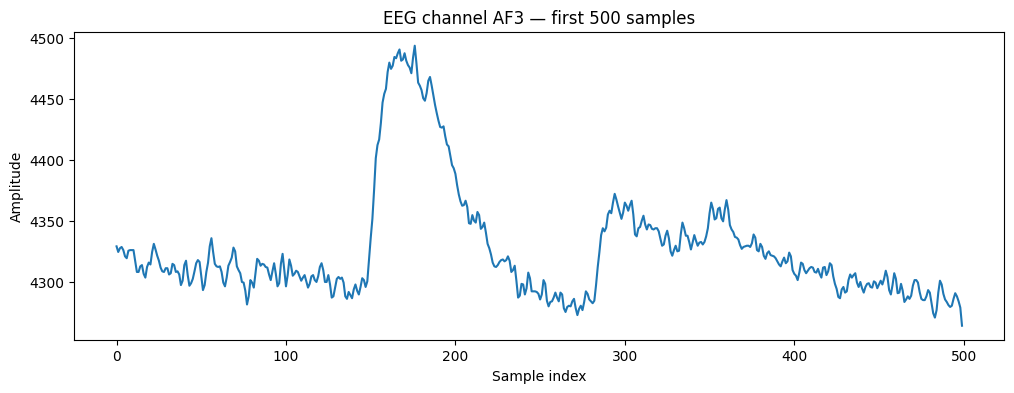

In [10]:
! pip install matplotlib
import matplotlib.pyplot as plt

# Plot first 500 samples of one channel (AF3)
plt.figure(figsize=(12,4))
plt.plot(df['AF3'][:500])
plt.title("EEG channel AF3 — first 500 samples")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.show()


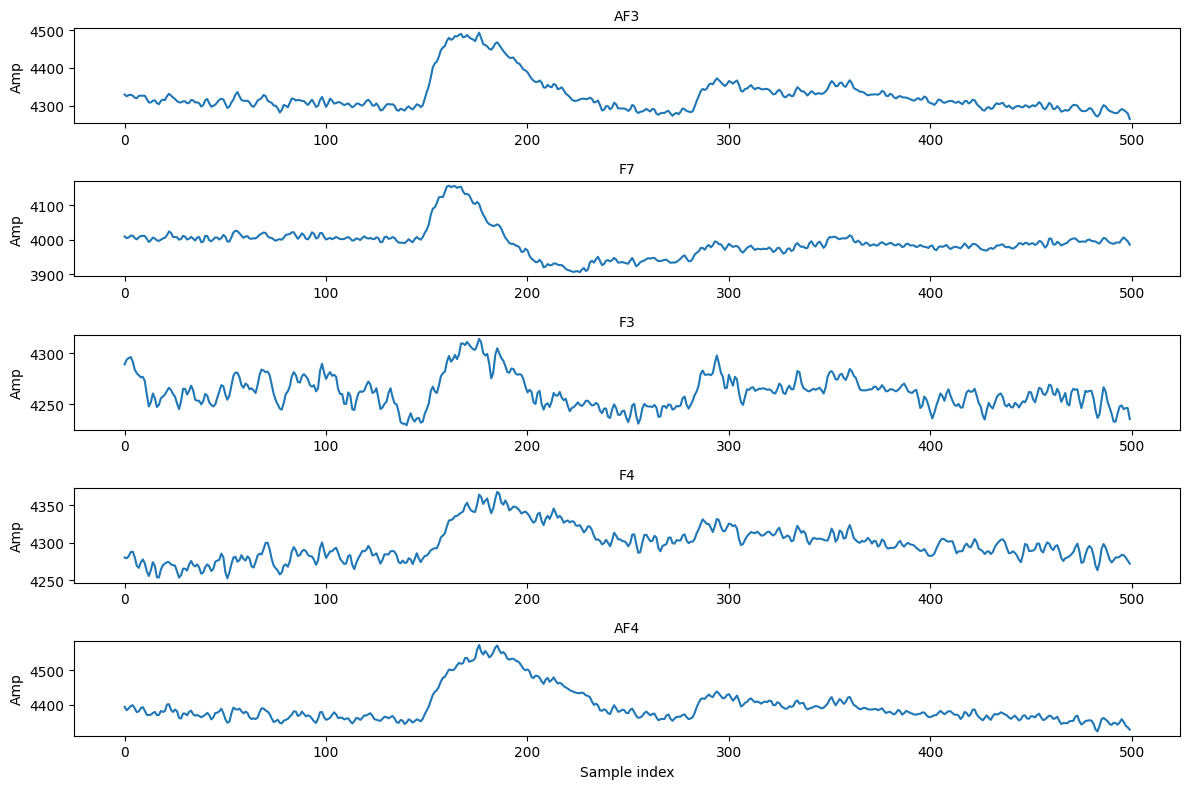

In [11]:
channels = ['AF3', 'F7', 'F3', 'F4', 'AF4']  # pick 5 frontal channels

plt.figure(figsize=(12,8))

for i, ch in enumerate(channels, 1):
    plt.subplot(len(channels), 1, i)   # row by row
    plt.plot(df[ch][:500])
    plt.title(ch, fontsize=10)
    plt.ylabel("Amp")
    if i == len(channels):   # only add xlabel for the last plot
        plt.xlabel("Sample index")

plt.tight_layout()
plt.show()


Eye open samples: 8257
Eye closed samples: 6723


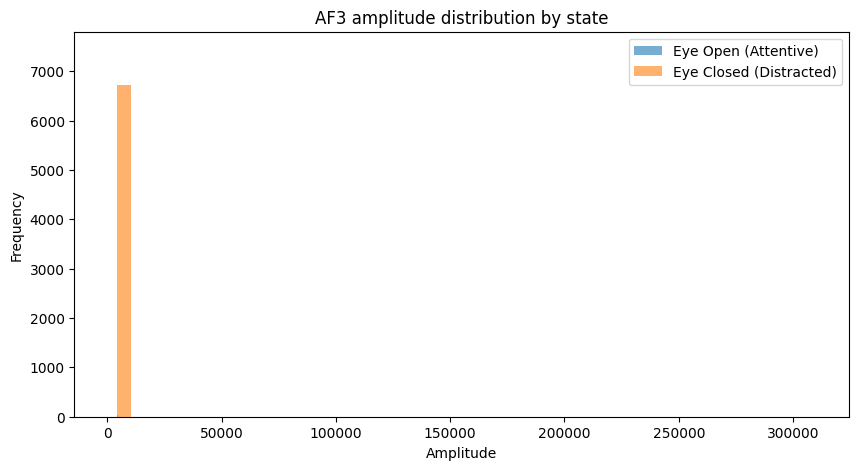

In [12]:
# Filter data by label
open_state = df[df['label'] == 0]
closed_state = df[df['label'] == 1]

print("Eye open samples:", open_state.shape[0])
print("Eye closed samples:", closed_state.shape[0])

# Plot distributions for one channel (AF3) under both conditions
plt.figure(figsize=(10,5))
plt.hist(open_state['AF3'], bins=50, alpha=0.6, label="Eye Open (Attentive)")
plt.hist(closed_state['AF3'], bins=50, alpha=0.6, label="Eye Closed (Distracted)")
plt.title("AF3 amplitude distribution by state")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Features = all EEG channels, Labels = 0/1
X = df.drop(columns=['label']).values
y = df['label'].values

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

# 2) Scale features (standardize: mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Feature shape: (14980, 14)
Label shape: (14980,)
Train size: (11984, 14)  Test size: (2996, 14)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2) Predictions on test set
y_pred = rf.predict(X_test)

# 3) Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Accuracy:", round(acc, 3))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Random Forest Accuracy: 0.931

Confusion Matrix:
 [[1581   70]
 [ 138 1207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1651
           1       0.95      0.90      0.92      1345

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


SVM (RBF) Accuracy: 0.635
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.91      0.73      1651
           1       0.73      0.30      0.42      1345

    accuracy                           0.63      2996
   macro avg       0.67      0.60      0.58      2996
weighted avg       0.66      0.63      0.59      2996



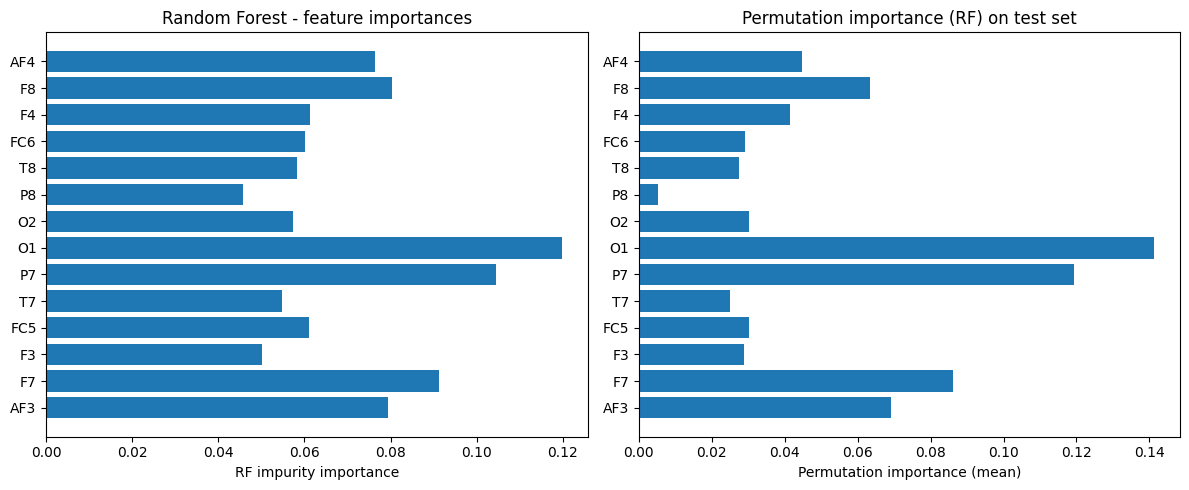

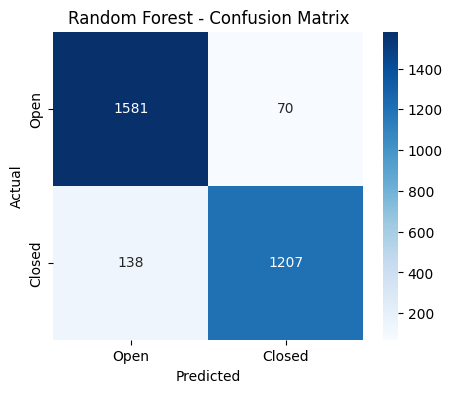


Summary saved to report_summary.txt


In [17]:
# Cell: Compare SVM, plot RF feature importance, confusion matrix, save summary
! pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

# ---------- 1) Train SVM (RBF) ----------
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM (RBF) Accuracy: {acc_svc:.3f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))

# ---------- 2) Feature importance for Random Forest (two ways) ----------
# (A) Built-in importances (mean decrease impurity)
imp = rf.feature_importances_
channels = df.columns.drop('label').tolist()

# (B) Permutation importance (more reliable)
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_means = perm.importances_mean

# Plot both (side-by-side)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ypos = np.arange(len(channels))
plt.barh(ypos, imp, align='center')
plt.yticks(ypos, channels)
plt.xlabel("RF impurity importance")
plt.title("Random Forest - feature importances")

plt.subplot(1,2,2)
plt.barh(ypos, perm_means, align='center')
plt.yticks(ypos, channels)
plt.xlabel("Permutation importance (mean)")
plt.title("Permutation importance (RF) on test set")
plt.tight_layout()
plt.show()

# ---------- 3) Confusion matrix heatmap for Random Forest ----------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Open','Closed'], yticklabels=['Open','Closed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ---------- 4) Save a small text summary ----------
acc_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred, digits=3)
report_svc = classification_report(y_test, y_pred_svc, digits=3)

summary = f"""
EEG Eye State - Model Comparison Summary
----------------------------------------
Random Forest Accuracy: {acc_rf:.3f}
Random Forest Classification Report:
{report_rf}

SVM (RBF) Accuracy: {acc_svc:.3f}
SVM Classification Report:
{report_svc}

Top RF feature importances (channel : importance):
"""
for ch, val in sorted(zip(channels, imp), key=lambda x: x[1], reverse=True)[:10]:
    summary += f"\n  {ch} : {val:.4f}"

with open("report_summary.txt","w") as f:
    f.write(summary)

print("\nSummary saved to report_summary.txt")


In [18]:
!pip install gitpython


You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [19]:
import os
import git

# Path to your local project folder
repo_dir = r"D:\HEgl data"

# Your GitHub repo URL (replace with yours)
repo_url = "https://github.com/chaitanyalogin/sample-EEG-Project.git"

# If repo not initialized, do it
if not os.path.exists(os.path.join(repo_dir, ".git")):
    repo = git.Repo.init(repo_dir)
    origin = repo.create_remote('origin', repo_url)
else:
    repo = git.Repo(repo_dir)

# Stage all changes
repo.git.add(all=True)

# Commit changes
repo.index.commit("Commit from Jupyter Notebook")

# Set main branch (if not already)
repo.git.branch('-M', 'main')

# Push to GitHub
origin = repo.remote(name='origin')
origin.push(refspec='main:main')

print("✅ Files pushed to GitHub!")


ImportError: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet


In [20]:
# Step A: check git availability
!git --version


'git' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
df.to_csv("eeg_eye_state_clean.csv", index=False)
